## Project 1: Customer Behaviour Analysis (Using Clustering)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Customers.csv')

In [4]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [3]:
dataset.shape

(200, 5)

In [20]:
dataset.tail(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [29]:
dataset.sort_values('Spending Score (1-100)', ascending = False).head(10)
#descending order of spending score.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99
19,20,Female,35,23,98
145,146,Male,28,77,97
185,186,Male,30,99,97
127,128,Male,40,71,95
167,168,Female,33,86,95
7,8,Female,23,18,94
141,142,Male,32,75,93
163,164,Female,31,81,93
41,42,Male,24,38,92


In [5]:
dataset.sort_values('Age', ascending = False).head(10)
#descending order of Age.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
70,71,Male,70,49,55
60,61,Male,70,46,56
57,58,Male,69,44,46
90,91,Female,68,59,55
67,68,Female,68,48,48
108,109,Male,68,63,43
82,83,Male,67,54,41
10,11,Male,67,19,14
102,103,Male,67,62,59
62,63,Female,67,47,52


c:\users\dellvostro\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

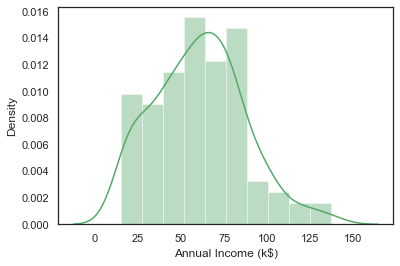

In [6]:
#Annual income plot
sns.set( style = "white" )  
sns.distplot(dataset['Annual Income (k$)'], kde = True, color = "g") 

c:\users\dellvostro\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

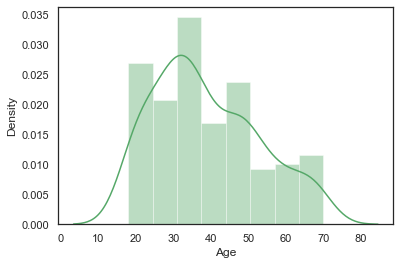

In [7]:
#Annual income plot
sns.set( style = "white" )  
sns.distplot(dataset['Age'], kde = True, color = "g") 

In [8]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

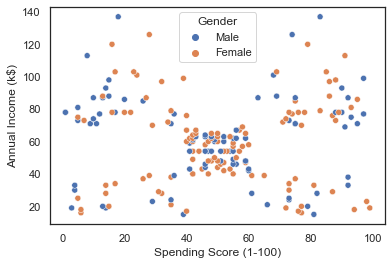

In [9]:
#See cluster by using scatter plotting
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', data=dataset)

<AxesSubplot:>

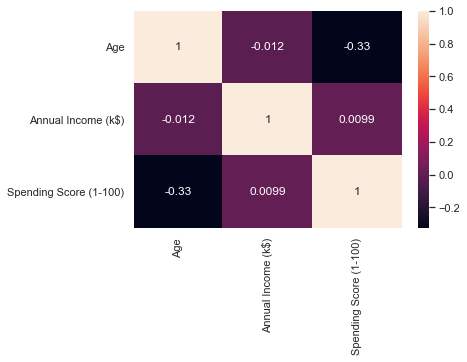

In [10]:
#Correlation Matrix.
df2 = dataset.drop(['CustomerID'], axis = 1)
sns.heatmap(df2.corr(), annot=True)

# Clustering 
For diffirent n_clusters values.

In [11]:
from sklearn.cluster import KMeans

In [12]:
X = dataset.iloc[:,[3,4]].values

In [13]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

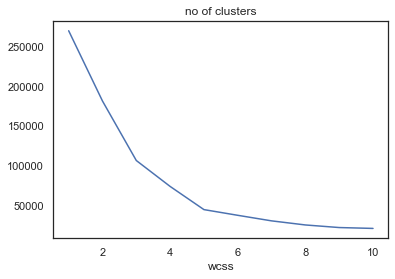

In [14]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.title('no of clusters')
plt.xlabel('wcss')
plt.show()

In [15]:
#n_clusters = 5
kmeansmodel =KMeans(n_clusters = 5, init = 'k-means++',random_state = 0)
y_kmeans = kmeansmodel.fit_predict(X)

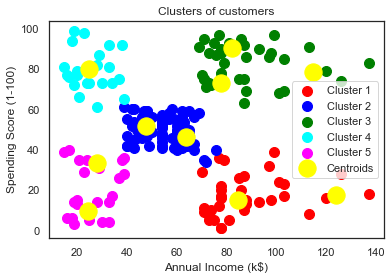

In [16]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [17]:
#For n_cluster = 4
kmeansmodel =KMeans(n_clusters = 4, init = 'k-means++',random_state = 0)
y_kmeans = kmeansmodel.fit_predict(X)

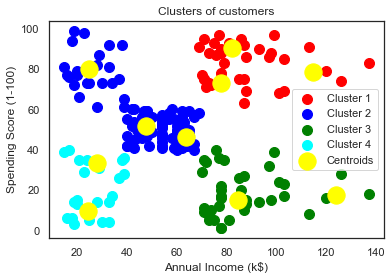

In [18]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

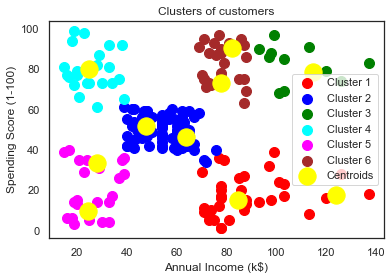

In [19]:
#For n_cluster = 6
kmeansmodel =KMeans(n_clusters = 6, init = 'k-means++',random_state = 0)
y_kmeans = kmeansmodel.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()